In [118]:
# Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [208]:
# Importing the dataset
df = pd.read_csv(r'O:\Masai\ML session file\Message_Data_Spam.csv', encoding='latin-1')

In [209]:
# renaming the columns
df.columns = ['spam', 'message']

In [210]:
df.head()

,spam,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [211]:
# checking for the null values
df.isnull().sum()

spam       0
message    0
dtype: int64

In [212]:
# checking the count of spam and ham messages
df['spam'].value_counts()

ham     4825
spam     747
Name: spam, dtype: int64

In [213]:
# converting all text messages to lower case
df['message'] = df['message'].str.lower()

In [214]:
# by utlising combination of apply, len and regex we're extracting number of words and characters in the text.
df['word_count'] = df['message'].str.split(' ').apply(len)
df['letter_count'] = df['message'].apply(lambda x: re.sub('[^\w]', '', x)).apply(len)

In [215]:
df.head()

,spam,message,word_count,letter_count
0,ham,"go until jurong point, crazy.. available only ...",20,83
1,ham,ok lar... joking wif u oni...,6,18
2,spam,free entry in 2 a wkly comp to win fa cup fina...,28,122
3,ham,u dun say so early hor... u c already then say...,11,33
4,ham,"nah i don't think he goes to usf, he lives aro...",13,47


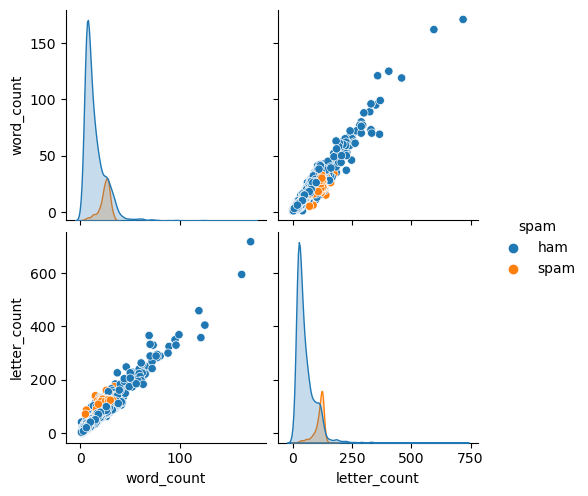

In [216]:
#pair plot
sns.pairplot(df, hue='spam')

In [193]:
import nltk
from nltk.corpus import stopwords

In [194]:
# downloading the stopwords 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Prakash
[nltk_data]     Khatri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [195]:
# creating a set of all stop words from the downloaded word dictonary.
stop_words = set(stopwords.words('english'))

In [196]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [197]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Prakash
[nltk_data]     Khatri\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [198]:
st = "creating a set of all stop words from the downloaded word dictonary."

In [199]:
n_st = nltk.word_tokenize(st)

In [200]:
clean = [word for word in n_st if word.lower() not in stop_words]

In [201]:
n_st

['creating',
 'a',
 'set',
 'of',
 'all',
 'stop',
 'words',
 'from',
 'the',
 'downloaded',
 'word',
 'dictonary',
 '.']

In [202]:
clean

['creating', 'set', 'stop', 'words', 'downloaded', 'word', 'dictonary', '.']

In [217]:
# This code is tokenizing the texts and dropping stop words.
df['message'] = df['message'].apply(lambda x : ' '.join([word for word in x.split() if word not in stop_words]))

In [218]:
import re

In [219]:
# cleaning the text messages using regex library
df['message'] = df['message'].apply(lambda x: re.sub("[^'.,a-z0-9 ]+", " ", x))

In [206]:
# we're now using lemmatization techniques to reduce the complexity of words

from nltk.stem import WordNetLemmatizer

In [97]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Prakash
[nltk_data]     Khatri\AppData\Roaming\nltk_data...


True

In [98]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to C:\Users\Prakash
[nltk_data]     Khatri\AppData\Roaming\nltk_data...


True

In [99]:
lem = WordNetLemmatizer()

In [101]:
[lem.lemmatize(i, pos='v') for i in ['buy', 'bought', 'buying']]

['buy', 'buy', 'buy']

In [220]:
df['message']

0       go jurong point, crazy.. available bugis n gre...
1                           ok lar... joking wif u oni...
2       free entry 2 wkly comp win fa cup final tkts 2...
3               u dun say early hor... u c already say...
4                 nah think goes usf, lives around though
                              ...                        
5567    2nd time tried 2 contact u. u  750 pound prize...
5568                           b going esplanade fr home 
5569             pity,   mood that. so...any suggestions 
5570    guy bitching acted like i'd interested buying ...
5571                                      rofl. true name
Name: message, Length: 5572, dtype: object

In [221]:
# from the above comparison it is clear that part of speech for some messages have been changed.
df['message'] = df['message'].apply(lambda x: ' '.join([lem.lemmatize(i, pos='v') for i in x.split()]))

In [222]:
df['message']

0       go jurong point, crazy.. available bugis n gre...
1                             ok lar... joke wif u oni...
2       free entry 2 wkly comp win fa cup final tkts 2...
3               u dun say early hor... u c already say...
4                    nah think go usf, live around though
                              ...                        
5567    2nd time try 2 contact u. u 750 pound prize. 2...
5568                               b go esplanade fr home
5569                pity, mood that. so...any suggestions
5570    guy bitch act like i'd interest buy something ...
5571                                      rofl. true name
Name: message, Length: 5572, dtype: object

In [226]:
# counting most frequent words and least ferquent words
term_frequency = pd.Series(''.join(df['message']).split()).value_counts()

In [234]:
most_freq_words = term_frequency.head(20)
least_freq_words = term_frequency[term_frequency <= 1]

In [238]:
most_freq_words

u       916
get     594
call    587
go      495
2       474
ur      357
lt      301
4       287
gt      282
i'm     266
come    261
.       232
send    229
like    222
know    213
free    206
want    184
time    180
tell    174
say     173
dtype: int64

In [240]:
least_freq_words

k61.              1
rs..dude          1
age.pls           1
ugadi             1
8.30              1
                 ..
help.babe         1
seaok.ps          1
xcheck            1
rightchinatown    1
freerofl.         1
Length: 10424, dtype: int64

In [239]:
df['message'] = df['message'].apply(lambda x : ' '.join([word for word in x.split() if word not in most_freq_words]))
df['message'] = df['message'].apply(lambda x : ' '.join([word for word in x.split() if word not in least_freq_words]))

In [241]:
df['message']

0             available bugis n great world e cine wat...
1                                      ok lar... joke wif
2       entry wkly comp win fa cup final tkts 21st may...
3                              dun early c already say...
4                           think usf, live around though
                              ...                        
5567    2nd try contact u. 750 pound prize. claim easy...
5568                                            b fr home
5569                         pity, mood that. suggestions
5570    guy bitch act i'd interest buy something else ...
5571                                      rofl. true name
Name: message, Length: 5572, dtype: object

In [246]:
df

,spam,message,word_count,letter_count
0,ham,available bugis n great world e cine wat...,20,83
1,ham,ok lar... joke wif,6,18
2,spam,entry wkly comp win fa cup final tkts 21st may...,28,122
3,ham,dun early c already say...,11,33
4,ham,"think usf, live around though",13,47
...,...,...,...,...
5567,spam,2nd try contact u. 750 pound prize. claim easy...,30,123
5568,ham,b fr home,8,29
5569,ham,"pity, mood that. suggestions",10,41
5570,ham,guy bitch act i'd interest buy something else ...,26,99


In [248]:
# dropping unnecessery columns before buildig a model
df.drop(['word_count', 'letter_count'], axis=1, inplace=True)

In [265]:
# shifting the positions of columns

df['spam'], df['message'] = df['message'], df['spam']
df.columns = ['message', 'spam']

In [274]:
df.head()

,message,spam
0,available bugis n great world e cine wat...,0
1,ok lar... joke wif,0
2,entry wkly comp win fa cup final tkts 21st may...,1
3,dun early c already say...,0
4,"think usf, live around though",0


In [271]:
# converting spam column into binnary values
df = pd.get_dummies(data=df, columns=['spam'], drop_first=True, prefix="", prefix_sep="")

In [275]:
# spltting the data for indipendent and dependent variable
x = df['message']
y = df['spam']

In [276]:
# diving the data into train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [279]:
# importing libraries for count vectorization
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [302]:
# converting series into count verctors
x_train_cv = cv.fit_transform(x_train)
x_test_cv = cv.transform(x_test)

In [303]:
x_train_cv

<3900x3963 sparse matrix of type '<class 'numpy.int64'>'
	with 27432 stored elements in Compressed Sparse Row format>

In [304]:
x_test_cv

<1672x3963 sparse matrix of type '<class 'numpy.int64'>'
	with 11290 stored elements in Compressed Sparse Row format>

In [305]:
# creating an ml model using using support vector machine
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

In [306]:
svm = LinearSVC()
svm.fit(x_train_cv, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [307]:
y_pred = svm.predict(x_test_cv)

In [308]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [312]:
# classification matrix to judge the accuracy of the model
pd.DataFrame(classification_report(y_test, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.976415,0.978723,0.976675,0.977569,0.976717
recall,0.997247,0.840183,0.976675,0.918715,0.976675
f1-score,0.986721,0.904177,0.976675,0.945449,0.975909
support,1453.000000,219.000000,0.976675,1672.000000,1672.000000


Text(0.5, 1.0, 'Confussion Matrix')

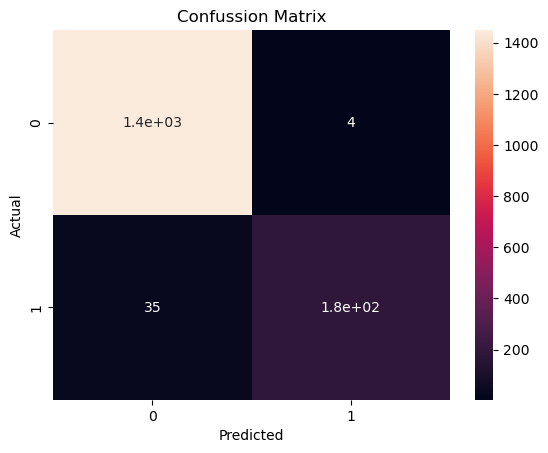

In [316]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confussion Matrix')

In [317]:
# Stroing the model
import pickle
import os

In [318]:
os.makedirs('spam_nlp', exist_ok=True)

In [319]:
pickle.dump(cv, open('spam_nlp/cv.pkl', 'wb'))
pickle.dump(svm, open('spam_nlp/svm.pkl', 'wb'))

In [322]:
cv_input = pickle.load(open('spam_nlp/cv.pkl', 'rb'))
svm_input = pickle.load(open('spam_nlp/svm.pkl', 'rb'))

In [330]:
text = '2nd try contact u. 750 pound prize. claim easy, 10p per minute. bt national rate.'
text = cv_input.transform([text])

svm_input.predict(text)

array([1], dtype=uint8)

### So here as you can see the output here predicted is as '1' with means spam